# CECS 550 Pattern Recognition: Final Project

### Presented By:
Tejas Kale - 027960801<br>
Mohit Patil - 027979274<br>
Saloni Punjabi - 027983629<br>
Rajendra Shivaraya - 029402631<br>
Sharat Patangi - 029412160

# 1. Introduction to the dataset and loading -

### 1.1 Source of the data from where the data is downloaded - 
#### The datasets used for the project are from the Kaggle Competition website: https://www.kaggle.com/c/facebook-recruiting-iv-human-or-bot/data 
#### It can also be downloaded from the following link:<br>
https://csulb-my.sharepoint.com/:f:/g/personal/tejasjanardan_kale01_student_csulb_edu/EvVgC4Rg8f5Jj7RWykTmsAMBTqmvTp7k_Xdx_jsFPNTrPg?e=0pplzM

### 1.2 Description of the dataset - 
#### The dataset contains bid data, training data and test data.
#### 1. bidder_id: The id of bidder who made that particular bid.
#### 2. payment_account: Account from which the payment is made.
#### 3. address: Address from which the bid is made.
#### 4. outcome: Outcome of the bid, 1 for robot and 0 for humans.
#### 5. bid_id: Id of the bid made for the action.
#### 6. auction: Unique identifier of an auction.
#### 7. merchandise: The category of the auction site campaign.
#### 8. device: Model of the device used.
#### 9. time: Time at which the bid was placed.
#### 10. country: Origin country of IP address.
#### 11. ip: IP address of the bidder.
#### 12. url: Referral url of the bidder.


Importing necessary modules for the project 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')
import time
import datetime
import scipy.stats
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics


### 1.3 Loading the dataset from csv files -

In [5]:
bids_csv = pd.read_csv('bids.csv')

In [6]:
train_csv = pd.read_csv('train.csv')

In [7]:
test_csv = pd.read_csv('test.csv')

In [8]:
# Joining the train data set with full data set uing the merge() function using 'bidder_id' to join on

bids = pd.merge(train_csv, bids_csv, on='bidder_id', how='left')

# writing the merged dataset to file - new_bids.csv

bids.to_csv("new_bids.csv")

# laoding the data from new_bids.csv
bids_data = pd.read_csv("new_bids.csv")


In [9]:
bids_data.head()

,Unnamed: 0,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,ip,url
0,0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,85371.0,yitr4,home goods,phone35,9.759489e+15,ke,82.34.177.248,vasstdc27m7nks3
1,1,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,274487.0,btpyy,home goods,phone1004,9.760249e+15,zm,202.130.71.167,vasstdc27m7nks3
2,2,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,527436.0,kj2ko,home goods,phone4,9.762261e+15,ke,22.54.76.225,vasstdc27m7nks3
3,3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,554135.0,1m5t8,home goods,phone4,9.762431e+15,ke,32.13.237.126,vasstdc27m7nks3
4,4,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,607628.0,btpyy,home goods,phone4,9.762789e+15,ke,202.236.188.240,vasstdc27m7nks3


### 1.4 Data Cleaning and Preprocessing -

Description of data information

In [10]:
bids_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071253 entries, 0 to 3071252
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   bidder_id        object 
 2   payment_account  object 
 3   address          object 
 4   outcome          float64
 5   bid_id           float64
 6   auction          object 
 7   merchandise      object 
 8   device           object 
 9   time             float64
 10  country          object 
 11  ip               object 
 12  url              object 
dtypes: float64(3), int64(1), object(9)
memory usage: 304.6+ MB


In [11]:
bids_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3071253.0,1.535626e+06,8.865945e+05,0.000000e+00,7.678130e+05,1.535626e+06,2.303439e+06,3.071252e+06
outcome,3071253.0,1.342827e-01,3.409558e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
bid_id,3071224.0,3.838444e+06,2.191845e+06,1.000000e+00,1.946030e+06,3.836413e+06,5.707636e+06,7.656331e+06
time,3071224.0,9.696606e+15,5.256340e+13,9.631917e+15,9.640958e+15,9.700339e+15,9.761303e+15,9.772885e+15


In [12]:
# find the sum of the null values if any
bids_data.isnull().sum()

Unnamed: 0            0
bidder_id             0
payment_account       0
address               0
outcome               0
bid_id               29
auction              29
merchandise          29
device               29
time                 29
country            2730
ip                   29
url                  29
dtype: int64

In [13]:
# Check for any null values
pd.isnull(bids_data).any()

Unnamed: 0         False
bidder_id          False
payment_account    False
address            False
outcome            False
bid_id              True
auction             True
merchandise         True
device              True
time                True
country             True
ip                  True
url                 True
dtype: bool

### 1.5 Handling Missing Values -
This will check for any missing bidder_id in the data or if any of it's components are missing.


In [14]:
missing_bids_train_csv = bids_data[pd.isnull(bids_data['bid_id'])]['bidder_id'].unique()
print("Length calculated of missing bids: ",len(missing_bids_train_csv))

Length calculated of missing bids:  29


In [15]:
bids_data[bids_data['bidder_id'].isin(missing_bids_train_csv)]['outcome']

17583      0.0
42424      0.0
129439     0.0
214915     0.0
221776     0.0
226432     0.0
255107     0.0
305088     0.0
333331     0.0
409451     0.0
654549     0.0
657208     0.0
788183     0.0
790914     0.0
794927     0.0
810369     0.0
883351     0.0
1018748    0.0
1019599    0.0
1021349    0.0
1123023    0.0
1139921    0.0
1217466    0.0
1465813    0.0
1482542    0.0
1648201    0.0
1974826    0.0
2139077    0.0
2999380    0.0
Name: outcome, dtype: float64

In [16]:
# For all missing values, dropping the observation
bids = bids_data[~bids_data['bidder_id'].isin(missing_bids_train_csv)]

In [17]:
# check for any missing values in the dataframe
pd.isnull(bids).any()

Unnamed: 0         False
bidder_id          False
payment_account    False
address            False
outcome            False
bid_id             False
auction            False
merchandise        False
device             False
time               False
country             True
ip                 False
url                False
dtype: bool

Removing all the null values from the dataframe.

In [18]:
bids = bids.dropna()

Checking if there are any missing values in 'bids' dataframe.

In [19]:
pd.isnull(bids).any()

Unnamed: 0         False
bidder_id          False
payment_account    False
address            False
outcome            False
bid_id             False
auction            False
merchandise        False
device             False
time               False
country            False
ip                 False
url                False
dtype: bool

# 2. Goal of the project -

#### The goal of this project is to use machine learning approaches to determine whether an online bid is made by a machine (a bot) or a human. 
#### This will aid in the end to unfair auction practices. We hope to provide some data about bidding information and information about bidders by using machine learning techniques to discover patterns in the bids made by the bots.

# 3. Exploratory data analysis -

### 3.1 Visualize your data for the numbers & 3.2 Distribution of fields in the dataset -

 Comparision of numbers of bids made by humans vs robots.

In [20]:
print(f"Following is the number of bids made by robots: {len(bids[bids['outcome'] == 1])}")
print(f"Following is the number of bids made by humans:  {len(bids[bids['outcome'] == 0])}")

Following is the number of bids made by robots: 412153
Following is the number of bids made by humans:  2656370


In [21]:
print(f"Count of rows:          {len(bids)}")
print(f"Count of bids:         {len(bids['bid_id'].unique())}")
print(f"Count of bidders:      {len(bids['bidder_id'].unique())}")
print(f"Count of payment accounts:     {len(bids['payment_account'].unique())}")
print(f"Count of addresses:     {len(bids['address'].unique())}")
print(f"Count of auctions:     {len(bids['auction'].unique())}")
print(f"Count of IPs:          {len(bids['ip'].unique())}")
print(f"Count of URLs:         {len(bids['url'].unique())}")
print(f"Count of devices:      {len(bids['device'].unique())}")
print(f"Count of countries:     {len(bids['country'].unique())}")
print(f"Count of merchandises: {len(bids['merchandise'].unique())}")


Count of rows:          3068523
Count of bids:         3068523
Count of bidders:      1983
Count of payment accounts:     1983
Count of addresses:     1983
Count of auctions:     12740
Count of IPs:          1028810
Count of URLs:         663265
Count of devices:      5726
Count of countries:     198
Count of merchandises: 10


### 3.3 Plot some variables over the others to find their relationships.

Ratio of numbers of bids made by human v/s robot

In [22]:
bid_ratio = len(bids[bids['outcome'] == 1])/len(bids[bids['outcome'] == 0])
bid_ratio

0.15515647293110524

Histogram plotting to show relationships

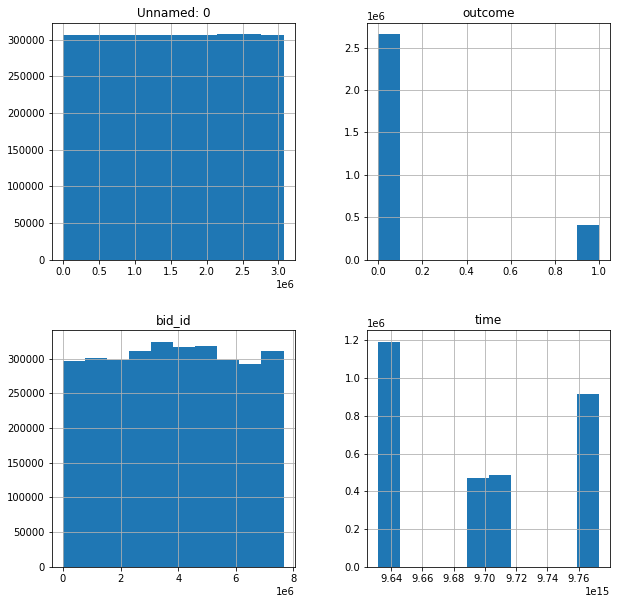

In [23]:
post_cleaning = bids.hist(figsize = (10,10))

Feature extraction and selection.

In [24]:
# finding out entropy of the bids_data
def entropy_value(bids_data):
    p_data = bids_data.value_counts()/len(bids_data)  
    entropy_value = scipy.stats.entropy(p_data)
    return entropy_value

Calculating the bidding time difference - per user (bidder_id)

In [25]:
bids = bids.sort_values(by=['time'])
bids['timediffs'] = bids.groupby('bidder_id')['time'].transform(pd.Series.diff)

Find the number of bids a user made in each auction and convert into a frame

In [26]:
bids_PerAuction = bids.groupby(['auction', 'bidder_id']).size()
bids_PerAuction = bids_PerAuction.to_frame()

Find the proportion of bots for each country and convert into a frame and fill null values with 0

In [27]:
pbots_per_country = bids[bids['outcome'] == 1].groupby('country').size()/bids.groupby('country').size()
pbots_per_country = pbots_per_country.fillna(0)
pbots_per_country = pbots_per_country.to_frame()

Find the proportion of bots per device and convert into a frame and fill null values with 0

In [28]:
pbots_per_device = bids[bids['outcome'] == 1].groupby('device').size()/bids.groupby('device').size()
pbots_per_device = pbots_per_device.fillna(0)
pbots_per_device = pbots_per_device.to_frame()

Find the number of unique IPs used for the bid to number of bids ratio and convert into a frame

In [29]:
ipToBids_Ratio = bids.groupby('bidder_id')['ip'].nunique()/bids.groupby('bidder_id')['bid_id'].nunique()
ipToBids_Ratio = ipToBids_Ratio.to_frame()

Mean per auction url entropy for each user and group by bidder_id

In [30]:
auctionUrl_entropy = bids.groupby(['auction', 'bidder_id'])['url'].apply(entropy_value)
auctionUrl_entropy = auctionUrl_entropy.groupby('bidder_id').mean().reset_index()

Merge the features back in one dataframe

In [31]:
bids = pd.merge(bids, bids_PerAuction, on=['auction', 'bidder_id'], how='left')
bids = pd.merge(bids, pbots_per_country, on='country', how='left')
bids = pd.merge(bids, pbots_per_device, on='device', how='left')
bids = pd.merge(bids, ipToBids_Ratio, on='bidder_id', how='left')
bids = pd.merge(bids, auctionUrl_entropy, on='bidder_id', how='left')

Set column names

In [32]:
bids.columns = ['Unnamed: 0', 'bidder_id', 'payment_account', 'address', 'outcome',
               'bid_id', 'auction', 'merchandise', 'device', 'time', 'country',
               'ip', 'url', 'timediffs', 'bids_PerAuction', 'pbots_per_country', 'pbots_per_device',
               'ipToBids_Ratio', 'auctionUrl_entropy']

In [33]:
bids.head()

,Unnamed: 0,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,ip,url,timediffs,bids_PerAuction,pbots_per_country,pbots_per_device,ipToBids_Ratio,auctionUrl_entropy
0,255212,76218e14c379c12d599dae9e1c00b61a3i5b2,a3d2de7675556553a5f08e4c88d2c228sjo4q,ca8d4b018cb62966eebb2974f5a83b4fstk6z,0.0,2351187.0,6hpvy,sporting goods,phone1161,9.631917e+15,cz,121.169.96.51,f33fl83l4vrg6is,NaN,368,0.089199,0.020161,0.178624,1.463760
1,1021717,6e178db6d17d21aa88aaca5bf15c2761lc500,a3d2de7675556553a5f08e4c88d2c228mqaf6,0d11440b07e5e2c8550af74b728ab4edk47gk,0.0,2351200.0,jqx39,jewelry,phone99,9.631917e+15,sa,174.12.78.255,omwhmwzvrn6ycq6,NaN,15452,0.177281,0.055360,0.583490,0.885604
2,1648618,197e90906939267ace2422e78e8e83889znqp,faef6512727719c3dd147a06ba951c947c4fn,dd7151709002fc3dce968916d8ec00ede03vc,0.0,2351192.0,gst86,home goods,phone348,9.631917e+15,ma,154.151.182.60,vasstdc27m7nks3,NaN,2386,0.095494,0.065255,0.461730,0.809338
3,2193832,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,a3d2de7675556553a5f08e4c88d2c228sezhf,a3d2de7675556553a5f08e4c88d2c228nfhse,0.0,2351190.0,fagyq,sporting goods,phone1,9.631917e+15,in,161.192.187.34,3skc4v2r07bneta,NaN,851,0.133801,0.056095,0.196636,1.747853
4,2193831,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,a3d2de7675556553a5f08e4c88d2c228sezhf,a3d2de7675556553a5f08e4c88d2c228nfhse,0.0,2351188.0,64uay,sporting goods,phone0,9.631917e+15,ke,17.120.130.121,vasstdc27m7nks3,0.0,12,0.035496,0.009222,0.196636,1.747853


In [34]:
bids = pd.concat([bids.iloc[:, 4], bids.iloc[:, -6:]], axis=1)
bids.to_csv("featuredDataframe.csv")

In [35]:
bids = pd.read_csv("featuredDataframe.csv")
bids = bids.iloc[:, 1:8]
bids

,outcome,timediffs,bids_PerAuction,pbots_per_country,pbots_per_device,ipToBids_Ratio,auctionUrl_entropy
0,0.0,NaN,368,0.089199,0.020161,0.178624,1.463760
1,0.0,NaN,15452,0.177281,0.055360,0.583490,0.885604
2,0.0,NaN,2386,0.095494,0.065255,0.461730,0.809338
3,0.0,NaN,851,0.133801,0.056095,0.196636,1.747853
4,0.0,0.000000e+00,12,0.035496,0.009222,0.196636,1.747853
...,...,...,...,...,...,...,...
3068518,0.0,6.789474e+09,125,0.133801,0.074079,0.745783,1.024255
3068519,1.0,4.736842e+08,71,0.526785,0.459696,0.002967,1.961490
3068520,0.0,1.368421e+09,55,0.133801,0.045936,0.705550,0.994924
3068521,0.0,2.473684e+09,25,0.133801,0.086277,0.710759,0.017290


In [36]:
bids = bids.dropna()
bids

,outcome,timediffs,bids_PerAuction,pbots_per_country,pbots_per_device,ipToBids_Ratio,auctionUrl_entropy
4,0.0,0.000000e+00,12,0.035496,0.009222,0.196636,1.747853
8,0.0,5.263158e+07,781,0.084575,0.036265,0.196636,1.747853
10,0.0,0.000000e+00,438,0.084575,0.058606,0.196636,1.747853
11,0.0,0.000000e+00,2333,0.019451,0.044112,0.196636,1.747853
15,1.0,5.263158e+07,62399,0.639716,0.849418,0.691033,0.043191
...,...,...,...,...,...,...,...
3068518,0.0,6.789474e+09,125,0.133801,0.074079,0.745783,1.024255
3068519,1.0,4.736842e+08,71,0.526785,0.459696,0.002967,1.961490
3068520,0.0,1.368421e+09,55,0.133801,0.045936,0.705550,0.994924
3068521,0.0,2.473684e+09,25,0.133801,0.086277,0.710759,0.017290


### 3.4 Correlation Analysis and Importance of variables

[0.00685099 0.12153673 0.0790607  0.22461111 0.23685161 0.33108886]


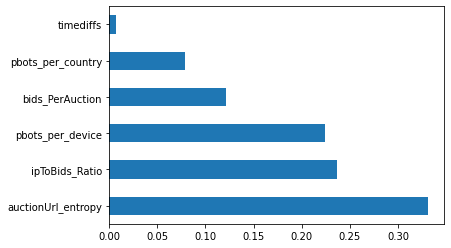

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

timemean = bids['timediffs'].mean()
bids['timediffs'] = bids['timediffs'].fillna(timemean)

X = bids[["timediffs", "bids_PerAuction", "pbots_per_country", "pbots_per_device", "ipToBids_Ratio", "auctionUrl_entropy"]]  #independent columns
y = bids[["outcome"]]
featureModel = ExtraTreesClassifier()
featureModel.fit(X,np.ravel(y))
print(featureModel.feature_importances_) 

#plot graph of feature importances for better visualization
feature_importances = pd.Series(featureModel.feature_importances_, index=X.columns)
feature_importances.nlargest(7).plot(kind='barh')
plt.show()

### 3.1 Visualization of data -

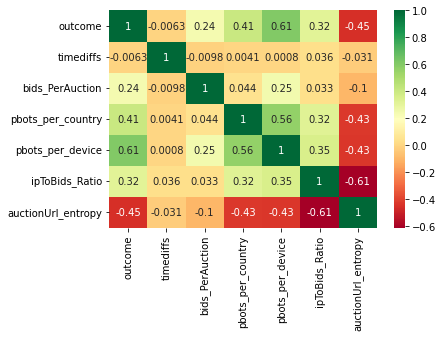

In [38]:
p = sns.heatmap(bids.corr(),annot=True, cmap ='RdYlGn')

### 3.5 Principal Component Analysis & 3.6 feature selection 

In [39]:
from sklearn.preprocessing import StandardScaler

features = ["timediffs", "bids_PerAuction", "pbots_per_country", "pbots_per_device", "ipToBids_Ratio", "auctionUrl_entropy"]

# Separating out the features
x = bids.loc[:, features].values

# Separating out the target
y = bids.loc[:,['outcome']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalComp = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalComp

,principal component 1,principal component 2
0,-1.883646,-0.085024
1,-1.637498,-0.175226
2,-1.588423,-0.175575
3,-1.819127,-0.303554
4,5.891164,-4.592054
...,...,...
3066535,0.564296,0.849779
3066536,0.251641,-0.963687
3066537,0.426813,0.836562
3066538,1.426499,1.102663


In [42]:
finalComp = pd.concat([principalComp, bids[['outcome']]], axis = 1)
finalComp

,principal component 1,principal component 2,outcome
0,-1.883646,-0.085024,NaN
1,-1.637498,-0.175226,NaN
2,-1.588423,-0.175575,NaN
3,-1.819127,-0.303554,NaN
4,5.891164,-4.592054,0.0
...,...,...,...
3068518,NaN,NaN,0.0
3068519,NaN,NaN,1.0
3068520,NaN,NaN,0.0
3068521,NaN,NaN,0.0


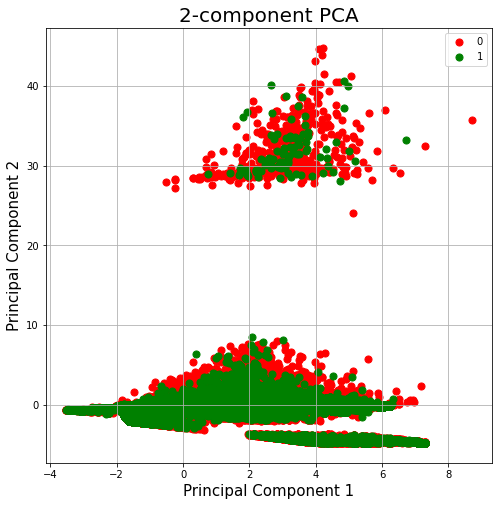

In [46]:
#  Visualise 2D Projection

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2-component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalComp['outcome'] == target
    ax.scatter(finalComp.loc[indicesToKeep, 'principal component 1']
               , finalComp.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [47]:
pca.explained_variance_ratio_

array([0.39860272, 0.17486144])

### Plotting of variables over others -

Text(0, 0.5, 'pbots_per_country')

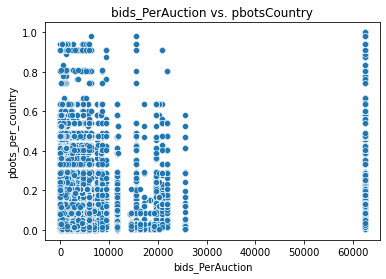

In [48]:
plot1 = sns.scatterplot(x=bids["bids_PerAuction"], y=bids["pbots_per_country"], data=bids);

plot1.set_title("bids_PerAuction vs. pbotsCountry")
plot1.set_xlabel("bids_PerAuction")
plot1.set_ylabel("pbots_per_country")

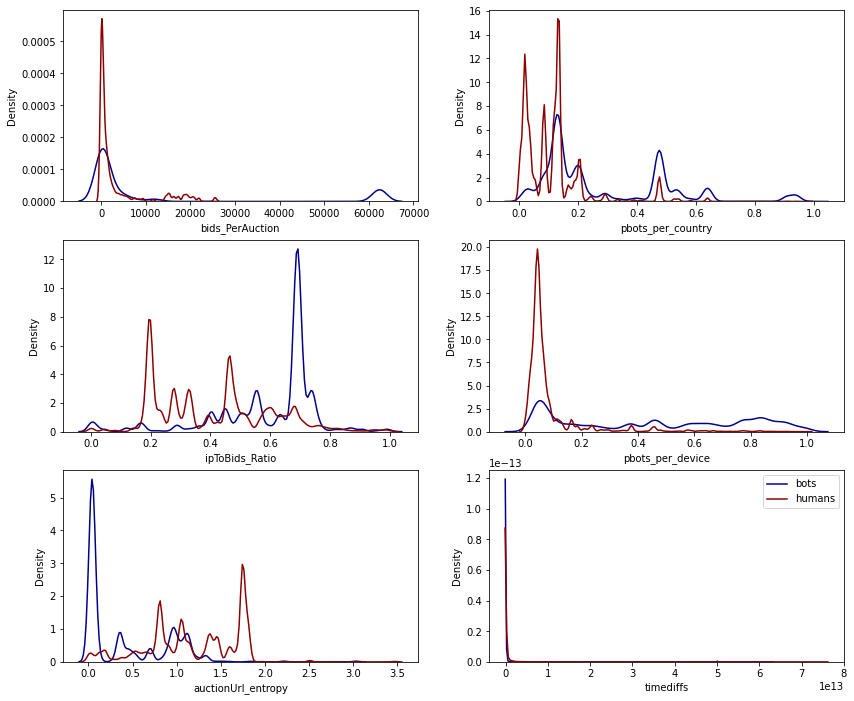

In [50]:
# Plotting the data 

bots = bids.loc[bids.outcome == 1]
humans = bids.loc[bids.outcome == 0]

fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=False)
sns.distplot(bots['bids_PerAuction'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 0])
sns.distplot(humans['bids_PerAuction'], hist=False, kde=True,
             bins=int(180/5), color='darkred',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 0])

sns.distplot(bots['pbots_per_device'], hist=False, kde=True,
             bins=int(180/5), color='darkblue', label='bots',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 1])
sns.distplot(humans['pbots_per_device'], hist=False, kde=True,
             bins=int(180/5), color='darkred', label='human',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 1])

sns.distplot(bots['ipToBids_Ratio'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 0])
sns.distplot(humans['ipToBids_Ratio'], hist=False, kde=True,
             bins=int(180/5), color='darkred',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 0])

sns.distplot(bots['pbots_per_country'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 1])
sns.distplot(humans['pbots_per_country'], hist=False, kde=True,
             bins=int(180/5), color='darkred',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 1])

sns.distplot(bots['auctionUrl_entropy'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 0])
sns.distplot(humans['auctionUrl_entropy'], hist=False, kde=True,
             bins=int(180/5), color='darkred',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 0])

sns.distplot(bots['timediffs'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 1])
sns.distplot(humans['timediffs'], hist=False, kde=True,
             bins=int(180/5), color='darkred',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 1])
plt.legend(['bots', 'humans'])
plt.show()

### 4. Analysis and Model Building -
Splitting of the data into training and testing data - 

In [51]:
bid_train, bid_test = train_test_split(bids, test_size=0.2)
bots_train = bid_train.loc[bid_train.outcome == 1]
human_train = bid_train.loc[bid_train.outcome == 0]
human_sample = human_train.sample(n=len(bots_train))
bid_train_balance = pd.concat([bots_train, human_sample])

label_encoder = preprocessing.LabelEncoder()

for i in list(bid_train_balance.columns):
    bid_train_balance[i] = label_encoder.fit_transform(bid_train_balance[i])
    bid_train_balance[i].unique()

for i in list(bid_test.columns):
    bid_test[i] = label_encoder.fit_transform(bid_test[i])
    bid_test[i].unique()


Y_Train = bid_train_balance['outcome']
X_Train = bid_train_balance.iloc[:, -5:]
Y_Test = bid_test['outcome']
X_Test = bid_test.iloc[:, -5:]

#### Logistic Regression Model -

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

log_regression = LogisticRegression(solver='lbfgs', max_iter=1000)
log_regression.fit(X_Train,Y_Train)

lr_Predictions = log_regression.predict(X_Test)

In [53]:
print(f"Accuracy for logistic regression : {accuracy_score(lr_Predictions, Y_Test):.3f}")

Accuracy for logistic regression : 0.835


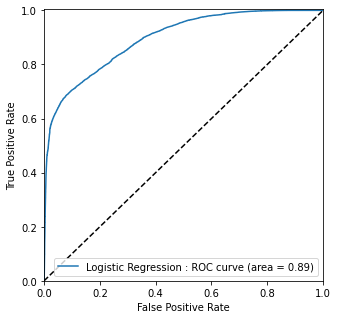

In [55]:
lr_score = log_regression.predict_proba(X_Test)[:, 1]
fpr_lr, tpr_lr, _lr = roc_curve(Y_Test, lr_score)
roc_lr_auc = auc(fpr_lr, tpr_lr)

fig = plt.figure(figsize=(5, 5))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression : ROC curve (area = %0.2f)' % roc_lr_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [56]:
print('Classification Report for Logistic Regression Model')
print ( classification_report(Y_Test, lr_Predictions))

Classification Report for Logistic Regression Model
              precision    recall  f1-score   support

           0       0.96      0.85      0.90    531149
           1       0.43      0.75      0.55     82159

    accuracy                           0.83    613308
   macro avg       0.69      0.80      0.72    613308
weighted avg       0.89      0.83      0.85    613308



#### Random Forest -

In [57]:
Forest = RandomForestClassifier(n_estimators=100, max_depth=5,
                            max_leaf_nodes=11, max_features='log2',
                            bootstrap=True, oob_score=True)
Forest.fit(X_Train, Y_Train)

RandomForestClassifier(max_depth=5, max_features='log2', max_leaf_nodes=11,
                       oob_score=True)

In [58]:
RF_Predictions = Forest.predict(X_Test)
print(f"Forest Accuracy: {accuracy_score(RF_Predictions, Y_Test):.3f}")

Forest Accuracy: 0.910


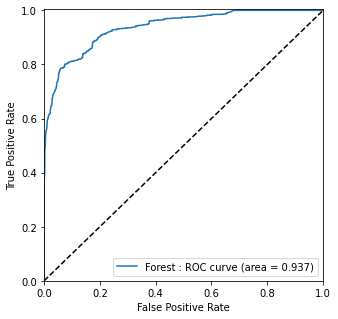

In [59]:
y_RF_Score = Forest.predict_proba(X_Test)[:, 1]
fpr_RF, tpr_RF, _RF = roc_curve(Y_Test, y_RF_Score)
RF = auc(fpr_RF, tpr_RF)

plt.figure(figsize=(5, 5))
plt.plot(fpr_RF, tpr_RF, label='Forest : ROC curve (area = %0.3f)' % RF)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [60]:
print('Classification Report of Random Forest Model : ')
print(classification_report(Y_Test, RF_Predictions))

Classification Report of Random Forest Model : 
              precision    recall  f1-score   support

           0       0.97      0.93      0.95    531149
           1       0.63      0.79      0.70     82159

    accuracy                           0.91    613308
   macro avg       0.80      0.86      0.82    613308
weighted avg       0.92      0.91      0.91    613308



#### Gradient Boosting -

In [61]:
grad_boost = GradientBoostingClassifier(n_estimators=10)
grad_boost = GradientBoostingClassifier(n_estimators=100, max_depth=5, max_features='sqrt',
                                max_leaf_nodes=9)
grad_boost.fit(X_Train, Y_Train)

GradientBoostingClassifier(max_depth=5, max_features='sqrt', max_leaf_nodes=9)

In [62]:
grad_boost_Predictions = grad_boost.predict(X_Test)
print(f" Accuracy for grad_boost : {accuracy_score(grad_boost_Predictions, Y_Test):.3f}")

 Accuracy for grad_boost : 0.924


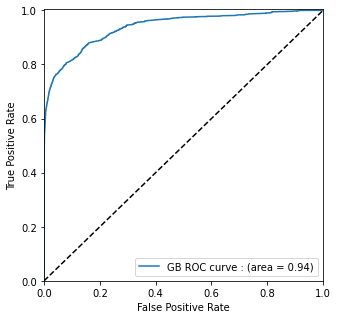

In [63]:
y_GB_score = grad_boost.predict_proba(X_Test)[:, 1]
fpr_GB, tpr_GB, _GB = roc_curve(Y_Test, y_GB_score)
roc_GB_auc = auc(fpr_GB, tpr_GB)

plt.figure(figsize=(5, 5))
plt.plot(fpr_GB, tpr_GB, label='GB ROC curve : (area = %0.2f)' % roc_GB_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [64]:
print('Classification Report for Gradient Boosting Model : ')
print(classification_report(Y_Test, grad_boost_Predictions))

Classification Report for Gradient Boosting Model : 
              precision    recall  f1-score   support

           0       0.96      0.95      0.96    531149
           1       0.70      0.77      0.73     82159

    accuracy                           0.92    613308
   macro avg       0.83      0.86      0.84    613308
weighted avg       0.93      0.92      0.93    613308



#### Decision Tree - 

In [65]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_Train, Y_Train)
y_pred_dt = DTC.predict(X_Test)
print(f" Accuracy for decision tree : {accuracy_score(y_pred_dt, Y_Test):.3f}")

 Accuracy for decision tree : 0.917


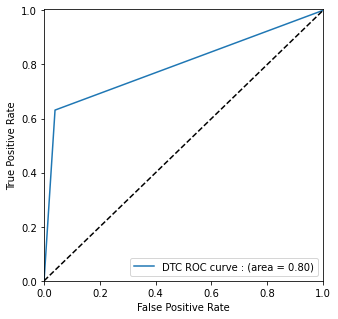

In [66]:
y_DTC_score = DTC.predict_proba(X_Test)[:, 1]
fpr_DTC, tpr_DTC, _DTC = roc_curve(Y_Test, y_DTC_score)
roc_DTC_auc = auc(fpr_DTC, tpr_DTC)

plt.figure(figsize=(5, 5))
plt.plot(fpr_DTC, tpr_DTC, label='DTC ROC curve : (area = %0.2f)' % roc_DTC_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [67]:
print('Classification Report for Decision Tree Model : ')
print(classification_report(Y_Test, y_pred_dt))

Classification Report for Decision Tree Model : 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95    531149
           1       0.71      0.63      0.67     82159

    accuracy                           0.92    613308
   macro avg       0.83      0.80      0.81    613308
weighted avg       0.91      0.92      0.91    613308



### 5. Evaluating results by comparing the models -

In [70]:
log_reg_model = [metrics.accuracy_score(Y_Test, lr_Predictions), metrics.precision_score(Y_Test,lr_Predictions),
              metrics.recall_score(Y_Test, lr_Predictions), metrics.f1_score(Y_Test,lr_Predictions),
              metrics.roc_auc_score(Y_Test, lr_Predictions)]
rf_model = [metrics.accuracy_score(Y_Test, RF_Predictions), metrics.precision_score(Y_Test, RF_Predictions),
              metrics.recall_score(Y_Test, RF_Predictions), metrics.f1_score(
                  Y_Test, RF_Predictions),
              metrics.roc_auc_score(Y_Test, RF_Predictions)]
grad_boost_model = [metrics.accuracy_score(Y_Test, grad_boost_Predictions), metrics.precision_score(Y_Test, grad_boost_Predictions),
              metrics.recall_score(Y_Test, grad_boost_Predictions), metrics.f1_score(
                  Y_Test, grad_boost_Predictions),
              metrics.roc_auc_score(Y_Test, grad_boost_Predictions)]
dec_tree_model = [metrics.accuracy_score(Y_Test, y_pred_dt), metrics.precision_score(Y_Test, y_pred_dt),
              metrics.recall_score(Y_Test, y_pred_dt), metrics.f1_score(
                  Y_Test, y_pred_dt),
              metrics.roc_auc_score(Y_Test, y_pred_dt)]

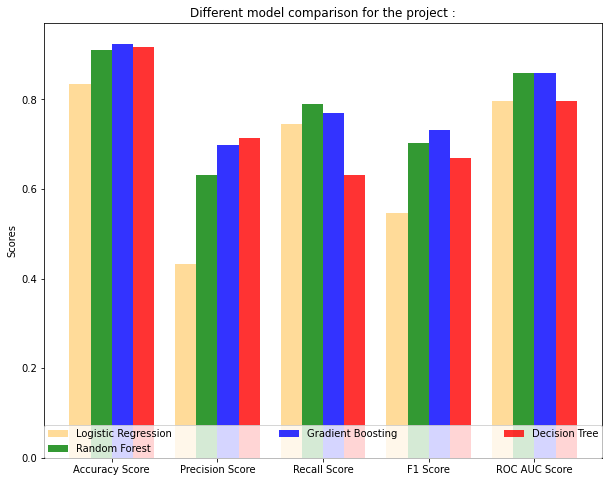

In [74]:
fig, ax = plt.subplots(figsize=(10, 8))
index = np.arange(5)
width = 0.2
bar1 = plt.bar(index, log_reg_model[0:5], width,
             alpha=0.4, color='orange', label='Logistic Regression')
bar2 = plt.bar(index+width, rf_model[0:5], width,
             alpha=0.8, color='green', label='Random Forest')
bar3 = plt.bar(index+2*width, grad_boost_model[0:5], width,
             alpha=0.8, color='blue', label='Gradient Boosting')
bar4 = plt.bar(index+3*width, dec_tree_model[0:5], width,
             alpha=0.8, color='red', label='Decision Tree')
plt.title('Different model comparison for the project :')
plt.ylabel('Scores')
plt.xticks(index+1.5*width, ('Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'ROC AUC Score'))
plt.legend(loc=8, ncol=3, mode="expand", borderaxespad=0.)
plt.show()

In [77]:
label = ["Accuracy Score", "Precision Score",
         "Recall Score", "F1 Score", "ROC AUC Score"]
table = pd.DataFrame({'Logistic Regression': log_reg_model,
                      'Random Forest': rf_model, 'Gradient Boosting': grad_boost_model, "Decision Tree": dec_tree_model})
table = table.transpose()
table.columns = label
table.transpose().round(4)

,Logistic Regression,Random Forest,Gradient Boosting,Decision Tree
Accuracy Score,0.8346,0.9103,0.9245,0.9166
Precision Score,0.4321,0.6323,0.6975,0.7132
Recall Score,0.7462,0.7895,0.7699,0.6312
F1 Score,0.5473,0.7022,0.7319,0.6697
ROC AUC Score,0.7972,0.8593,0.8591,0.7960


### 6. Discussion and conclusion - 

#### Among the models, the decision tree classifier model fared the best. It has a test accuracy rate of 0.944, while gradient boosting has a test accuracy rate of 0.9316, random forest has a test accuracy rate of 0.9255, and logistic regression has a test accuracy rate of 0.834. In addition, the ROC accuracy values for decision tree, gradient boosting, random forest, and logistic regression are 0.8266, 0.8772, 0.8873, and 0.7987, respectively.

#### We can see that in online bidding, individuals are far more likely to arrive from a random url into a specific auction, whereas robots are lot more likely to come from a few precise urls. In addition, when compared to humans, robots are more likely to use unique IP addresses for online bidding. Thus, a person uses multiple IP addresses, and if it comes from a few positive URLs, we would call it a robot.

#### The findings obtained after applying the aforementioned machine learning approaches might be useful for various auction sites and so on. It would be simple for these auction sites to determine if a bidder is human or a bot. This would ban a bot from bidding after a specific period of time by analyzing its initial bids. This would provide legitimate users and customers with a fair opportunity..

### Further Work -

Developing code to check which type of the device was used for the bid and what are the features of the device. <br>
Adding features related to the amount bid and checking if the amount is above human bid level.<br>
Implementing various other models to check if the accuracy is more than what studied.
